In [57]:
import pandas as pd
df = pd.read_csv('boston.csv')
print(df.shape)

(506, 14)


In [58]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [59]:
df.isna().sum().sum()

120

In [60]:
fn = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
cn = ['low', 'high']

for col in fn:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [61]:
df.isna().sum().sum()

0

In [62]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y_clss = [1 if price > 20 else 0 for price in y]

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_clss, test_size=0.2, random_state=42)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,0.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,100.0,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


In [64]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))


accuracy_score: 0.8529411764705882
[[43  7]
 [ 8 44]]


[Text(0.5, 0.9166666666666666, 'LSTAT <= 14.4\ngini = 0.483\nsamples = 404\nvalue = [165, 239]\nclass = high'),
 Text(0.2875, 0.75, 'RM <= 6.034\ngini = 0.286\nsamples = 272\nvalue = [47, 225]\nclass = high'),
 Text(0.1625, 0.5833333333333334, 'DIS <= 6.555\ngini = 0.498\nsamples = 68\nvalue = [32, 36]\nclass = high'),
 Text(0.1, 0.4166666666666667, 'CRIM <= 0.068\ngini = 0.474\nsamples = 57\nvalue = [22, 35]\nclass = high'),
 Text(0.05, 0.25, 'PTRATIO <= 19.05\ngini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = low'),
 Text(0.025, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = high'),
 Text(0.075, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = low'),
 Text(0.15, 0.25, 'RM <= 5.845\ngini = 0.43\nsamples = 48\nvalue = [15, 33]\nclass = high'),
 Text(0.125, 0.08333333333333333, 'gini = 0.496\nsamples = 22\nvalue = [12, 10]\nclass = low'),
 Text(0.175, 0.08333333333333333, 'gini = 0.204\nsamples = 26\nvalue = [3, 23]\nclass = high'),
 Text

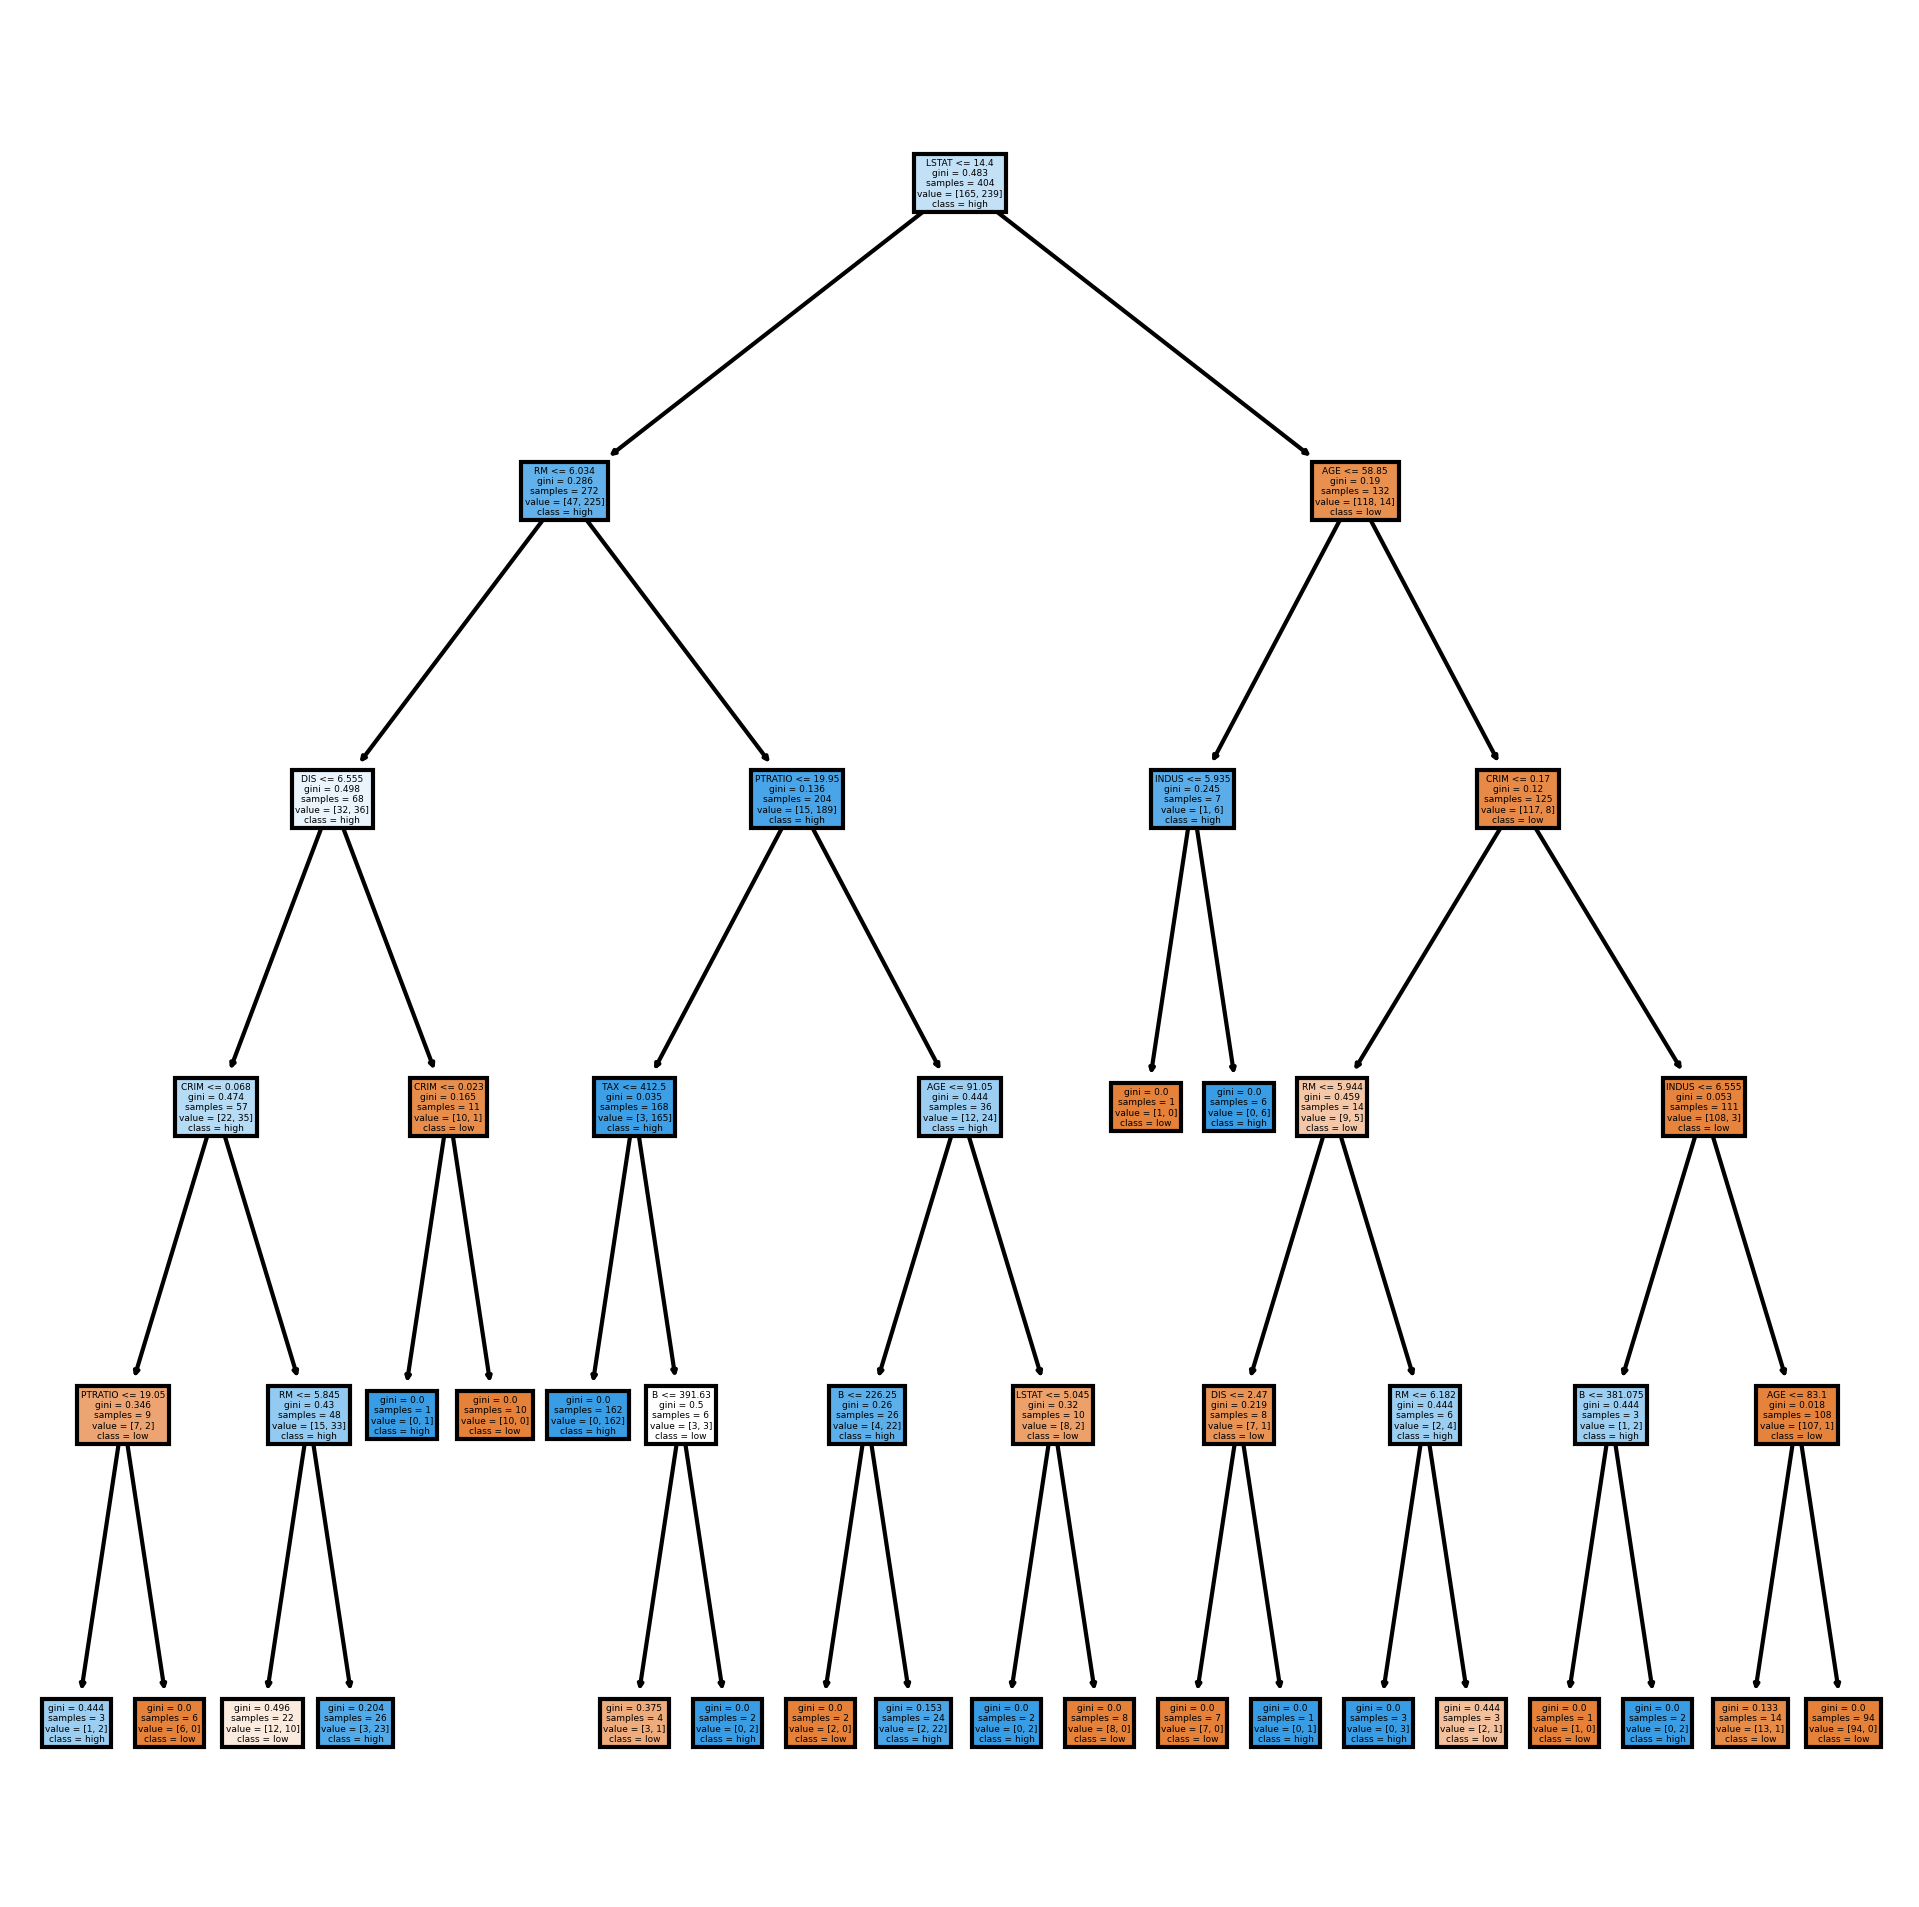

In [67]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=300)
tree.plot_tree(dt_model, feature_names=fn, class_names=cn, filled=True)